# Comparing the variance in TF binding

In [8]:
%load_ext autoreload
%autoreload 2
%matplotlib inline



import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from scipy.stats import gaussian_kde, pearsonr, spearmanr, fisher_exact
from statsmodels.stats.multitest import multipletests

from matplotlib.patches import Patch

import seaborn as sns
import pandas as pd
from functools import reduce
import utils_matanya as um
import subprocess

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
# Useful constants

SELECTED_RUN = "run_2025_04_09"
SELECTED_NON_DA_RUN = 'run_non_da'

MY_DATA_DIR = "/home/labs/davidgo/matanyaw/data"
RESULTS_DIR = f"/home/labs/davidgo/matanyaw/results/{SELECTED_RUN}"
os.makedirs(RESULTS_DIR, exist_ok=True)


OVERALL_TF_BINDING_DIR = os.path.join(RESULTS_DIR, "overall_tf_binding_differences")
OVERALL_TF_BINDING_DIR_NON_DA = f"/home/labs/davidgo/matanyaw/results/{SELECTED_NON_DA_RUN}/overall_tf_binding_differences"




In [ ]:
TF_BINDING_DIFFERENCES_FILE = os.path.join(OVERALL_TF_BINDING_DIR, "TF_overall_binding_differences.csv")
tf_binding_differences_df = pd.read_csv(TF_BINDING_DIFFERENCES_FILE, index_col=0).T
tf_binding_differences_df = tf_binding_differences_df.loc[:, ~tf_binding_differences_df.columns.duplicated()]
tf_binding_differences_df


,ARX,Ahctf1,Alx3,Alx4,Ar,Arid3a,Arid5a,Ascl2,Atf3,BCL11A,...,TFAP2A,Tbx2,Tef,VAX2,VENTX,VSX1,VSX2,WT1,ZNF200,ZNF655
seq_295193_chr12:54782669-54782938_SCREEN_a2_L3,0.0000,0.0000,0.0000,0.0000,0.0000,1.162730,1.575530,4.032911,0.000,0.0000,...,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,1.5044,0.0,0.0000
seq_71981_chr12:67085937-67086206_SCREEN_a2_L1,2.7807,5.3654,2.7213,6.9911,0.0000,3.266925,2.802036,2.529784,0.000,0.0000,...,0.0000,0.0000,-0.7,4.4412,-1.7899,3.1938,2.5473,0.0000,0.0,0.0000
seq_33133_chr11:119894841-119895110_SCREEN_a1_L1,0.0000,0.0000,0.0000,0.0000,0.0000,-0.992740,3.257774,-2.118522,0.000,0.0000,...,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000
seq_248781_chr18:75279211-75279480_SCREEN_a3_L2,0.0000,0.0000,0.0000,0.0000,0.0000,1.919853,-2.676060,-1.973593,0.000,-1.2220,...,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000
seq_147743_chr2:135099118-135099387_SCREEN_a1_L2,0.0000,0.0000,0.0000,0.0000,0.0000,1.688172,1.741709,1.579540,0.000,0.0000,...,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
seq_292377_chr2:134103245-134103514_SCREEN_a2_L3,0.0000,0.0000,0.0000,0.0000,0.0000,3.398744,-1.584520,1.736507,0.000,0.0000,...,0.0000,-7.5715,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,-3.3746
seq_34252_chr7:43331359-43331628_SCREEN_a1_L1,0.0000,0.0000,0.0000,0.0000,0.0000,2.932179,-1.398006,1.877061,0.000,-3.5202,...,3.8378,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000
seq_185850_chr21:46469828-46470097_SCREEN_a2_L2,0.0000,2.5201,0.0000,0.0000,3.8692,4.098923,2.748593,3.426680,0.000,0.0000,...,0.0000,-2.4109,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,1.0320
seq_135927_chr12:43281493-43281762_SCREEN_a1_L2,4.2163,6.8531,4.5466,9.8966,0.0000,3.192678,3.571664,2.249460,1.431,0.0000,...,0.0000,0.0000,0.0,10.0000,0.0000,5.2351,4.2920,0.0000,0.0,0.0000


In [16]:
# TF_BINDING_DIFFERENCES_FILE_NON_DA = os.path.join(OVERALL_TF_BINDING_DIR_NON_DA, "TF_overall_binding_differences.csv")
TF_BINDING_DIFFERENCES_FILE_NON_DA = '/home/labs/davidgo/matanyaw/results/run_non_DA/overall_tf_binding_differences/TF_overall_binding_differences.csv'
tf_binding_differences_df_non_da = pd.read_csv(TF_BINDING_DIFFERENCES_FILE_NON_DA, index_col=0).T
tf_binding_differences_df_non_da = tf_binding_differences_df_non_da.loc[:, ~tf_binding_differences_df_non_da.columns.duplicated()]
tf_binding_differences_df_non_da

,ARX,Ahctf1_mus_musculus,Alx3_mus_musculus,Alx4_mus_musculus,Ar_mus_musculus,Arid3a_mus_musculus,Arid5a_mus_musculus,Ascl2_mus_musculus,Atf3_mus_musculus,BCL11A,...,TFAP2A_mus_musculus,Tbx2_mus_musculus,Tef_mus_musculus,VAX2,VENTX,VSX1,VSX2,WT1,ZNF200,ZNF655
seq_327284_chr12:102329728-102329997_SCREEN_a2_L3,2.6046,1.9234,2.5892,4.7882,0.0000,-2.413602,2.735424,2.734043,0.0,-8.7411,...,0.0,0.0000,0.0000,10.0000,0.0000,5.1336,0.0000,0.0000,0.000,0.0000
seq_249187_chr2:173504631-173504900_SCREEN_a3_L2,0.0000,3.9722,0.0000,0.0000,0.0000,2.831987,3.444645,2.039313,0.0,0.0000,...,0.0,2.2932,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000
seq_373054_chr5:40835288-40835557_SCREEN_a1_L4;CGI.fix;reverse,0.0000,0.0000,0.0000,0.0000,0.0000,-1.186950,1.772851,2.503129,0.0,0.0000,...,0.0,-3.4958,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,1.7235
seq_321615_chr1:76668763-76669032_SCREEN_a2_L3,-1.0329,0.0000,0.0000,0.0000,0.0000,-3.154402,-0.930622,-2.450398,0.0,0.0000,...,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000
seq_92763_chr6:159412026-159412295_SCREEN_a3_L1,0.9125,-1.2859,0.3245,-2.0299,0.0000,-2.681160,-1.193384,1.632258,0.0,0.0000,...,0.0,0.0000,-2.6437,0.7053,0.0000,1.0010,-2.6735,-1.6429,4.163,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
seq_52953_chr8:11272002-11272271_SCREEN_a1_L1,0.0000,0.0000,0.0000,0.0000,0.0000,-1.864881,1.214054,2.193932,0.0,-10.0000,...,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000
seq_378188_chrX:591189-591458_SCREEN_a1_L4;CGI.fix;forward,0.0000,0.0000,0.0000,0.0000,0.0000,3.192500,1.205204,3.310876,0.0,0.0000,...,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000
seq_41400_chr13:73823197-73823466_SCREEN_a1_L1,0.0000,1.3366,0.0000,-2.4169,-2.0219,-2.270943,-3.083968,-2.346831,0.0,0.0000,...,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000
seq_261160_chr14:69931680-69931949_SCREEN_a1_L3,0.0000,1.4561,-0.0789,2.3056,0.0000,-2.893705,-2.288940,2.389322,0.0,-9.0621,...,0.0,0.0000,0.0000,0.0000,0.0000,0.5325,-0.2046,0.0000,0.000,0.0000


In [21]:
tf_binding_variance = tf_binding_differences_df.abs().sum(axis=0)  # axis=0 → variance per TF (column)
variance_df = tf_binding_variance.reset_index()
variance_df.columns = ["TF", "Variance"]
# variance_df.sort_values(by="Variance", ascending=False, inplace=True)
variance_df

tf_binding_variance_non_da = tf_binding_differences_df_non_da.abs().sum(axis=0)  # axis=0 → variance per TF (column)
variance_df_non_da = tf_binding_variance_non_da.reset_index()
variance_df_non_da.columns = ["TF", "Variance"]
variance_df_non_da

,TF,Variance
0,ARX,6484.3056
1,Ahctf1_mus_musculus,17245.8691
2,Alx3_mus_musculus,8928.5703
3,Alx4_mus_musculus,13649.9291
4,Ar_mus_musculus,6565.4984
...,...,...
115,VSX1,10179.8068
116,VSX2,5989.5755
117,WT1,3574.5949
118,ZNF200,1686.1286


In [ ]:
# tf_binding_variance_non_da = tf_binding_differences_df_non_da.abs().sum(axis=0)  # axis=0 → variance per TF (column)
# variance_df_non_da = tf_binding_variance_non_da.reset_index()
# variance_df_non_da.columns = ["TF", "Variance"]
# variance_df_non_da

,TF,Variance
0,ARX,6484.3056
1,Ahctf1_mus_musculus,17245.8691
2,Alx3_mus_musculus,8928.5703
3,Alx4_mus_musculus,13649.9291
4,Ar_mus_musculus,6565.4984
...,...,...
115,VSX1,10179.8068
116,VSX2,5989.5755
117,WT1,3574.5949
118,ZNF200,1686.1286


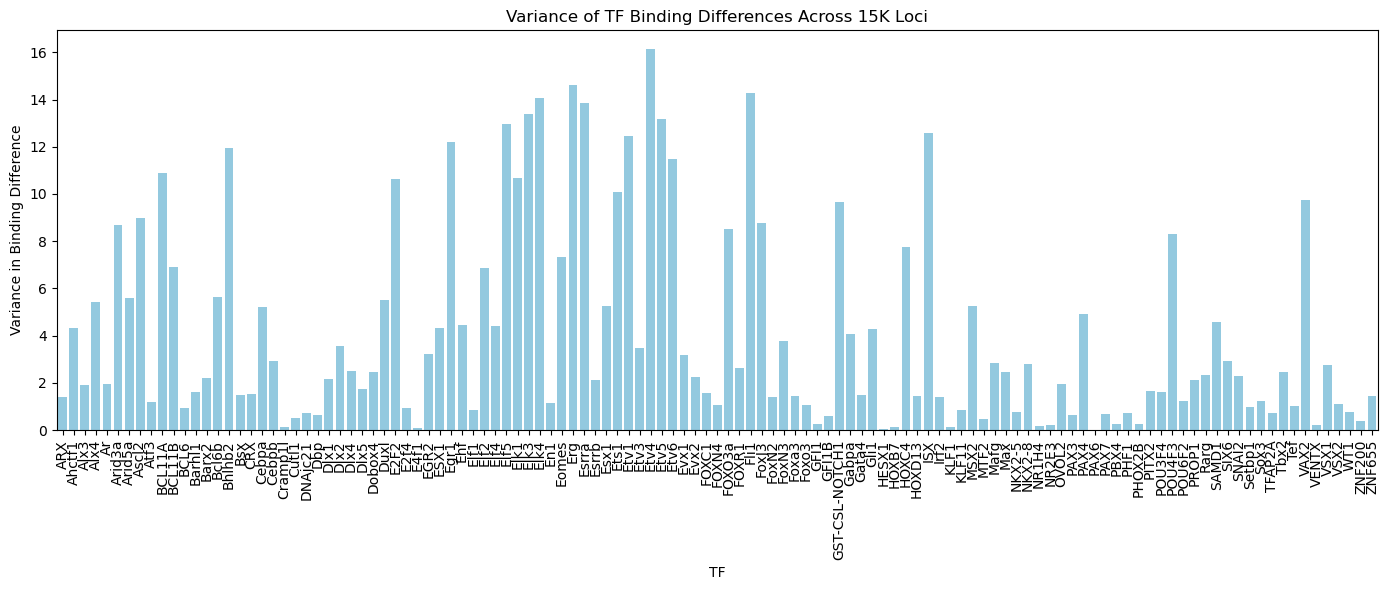

In [ ]:
# plt.figure(figsize=(14, 6))
# sns.barplot(data=variance_df, x="TF", y="Variance", color="skyblue")
# plt.xticks(rotation=90)
# plt.xlabel("TF")
# plt.ylabel("Variance in Binding Difference")
# plt.title("Variance of TF Binding Differences Across 15K Loci")
# plt.tight_layout()
# plt.savefig(os.path.join(OVERALL_TF_BINDING_DIR, "tf_binding_variance_barplot.png"))
# plt.show()

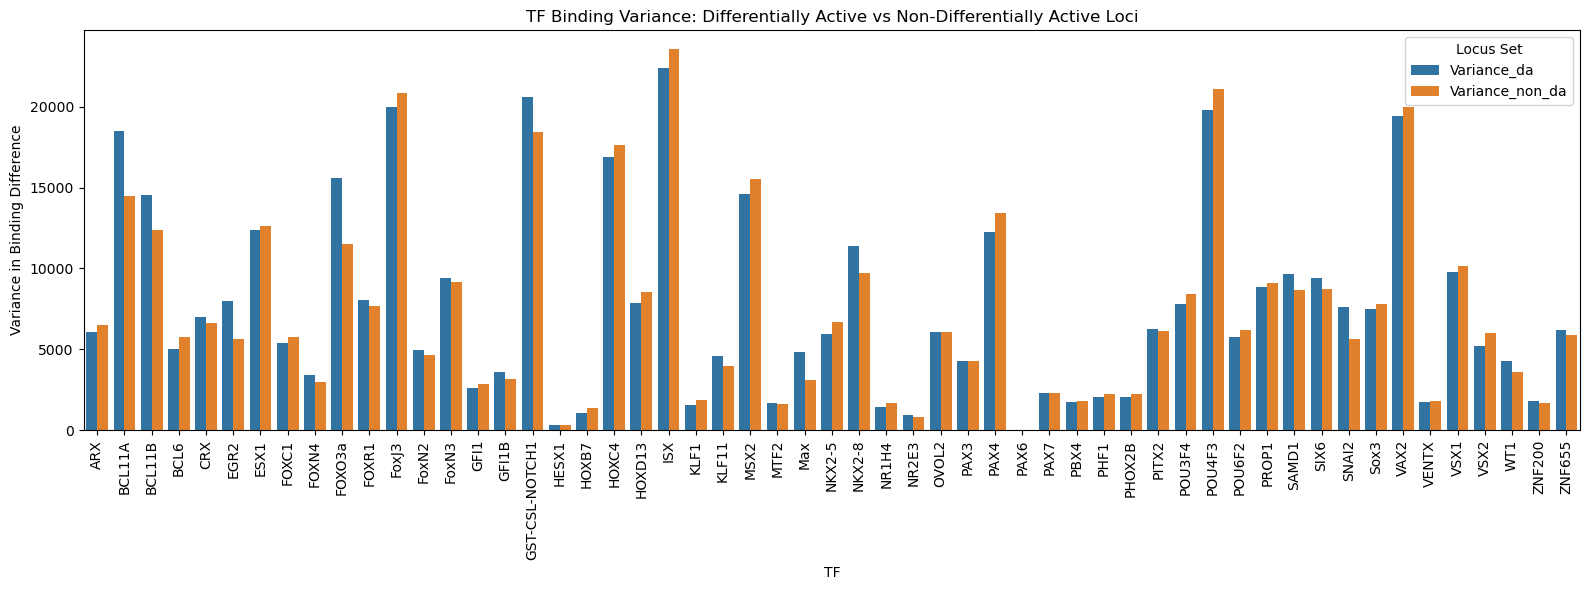

In [22]:
# 1. Merge both variance DataFrames
merged_variance_df = pd.merge(
    variance_df, 
    variance_df_non_da, 
    on="TF", 
    suffixes=("_da", "_non_da")
)

# 2. Melt for seaborn (long-form for grouped barplot)
variance_melted = merged_variance_df.melt(id_vars="TF", 
                                           value_vars=["Variance_da", "Variance_non_da"],
                                           var_name="Dataset", 
                                           value_name="Variance")

# 3. Plot
plt.figure(figsize=(16, 6))
sns.barplot(data=variance_melted, x="TF", y="Variance", hue="Dataset")
plt.xticks(rotation=90)
plt.xlabel("TF")
plt.ylabel("Variance in Binding Difference")
plt.title("TF Binding Variance: Differentially Active vs Non-Differentially Active Loci")
plt.legend(title="Locus Set")
plt.tight_layout()
plt.savefig(os.path.join(OVERALL_TF_BINDING_DIR, "tf_binding_variance_comparison_barplot.png"))
plt.show()
